In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("01_framingham_clean.csv")
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,27.0,80.0,77.0,0,0,0,1,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,29.0,95.0,76.0,0,1,0,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.0,75.0,70.0,1,0,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,29.0,65.0,103.0,0,0,1,0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.0,85.0,85.0,0,0,1,0,0


In [2]:
# train test val split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["TenYearCHD"])
y = df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)



In [3]:
# Apply undersampling to balance the classes in the training set
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=1)  # 1: equal balance between the classes
X_under, y_under = undersample.fit_resample(X_train, y_train)

X_train = X_under
y_train = y_under


In [ ]:
# Scale the test and validation sets as well
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Generalized Functions for Machine Learning and Model Optimization

## Import Libraries

In [5]:
# import all necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

## Function for Machine Learning Model

In [6]:
def ml_model(model, X_train, y_train, X_test, y_test, X_val, y_val):
   
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    
    # Predict on the validation set
    y_pred_val = model.predict(X_val)
    y_pred_proba_val = model.predict_proba(X_val)[:, 1]
    
    # Calculate performance metrics for the test set
    acc_test = accuracy_score(y_test, y_pred_test)
    prec_test = precision_score(y_test, y_pred_test)
    rec_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    roc_test = roc_auc_score(y_test, y_pred_proba_test)
    
    # Calculate performance metrics for the validation set
    acc_val = accuracy_score(y_val, y_pred_val)
    prec_val = precision_score(y_val, y_pred_val)
    rec_val = recall_score(y_val, y_pred_val)
    f1_val = f1_score(y_val, y_pred_val)
    roc_val = roc_auc_score(y_val, y_pred_proba_val)
    
    # Print performance on the test set
    print("Test Set Performance:")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_pred_test))
    print("\nAccuracy of Model (Test):", acc_test * 100, "\n")
    print(classification_report(y_test, y_pred_test))
    
    # Print performance on the validation set
    print("Validation Set Performance:")
    print("Confusion Matrix (Validation):")
    print(confusion_matrix(y_val, y_pred_val))
    print("\nAccuracy of Model (Validation):", acc_val * 100, "\n")
    print(classification_report(y_val, y_pred_val))
    
    return {
        'Test Accuracy': acc_test,
        'Test Precision': prec_test,
        'Test Recall': rec_test,
        'Test F1-Score': f1_test,
        'Test ROC AUC': roc_test,
        'Validation Accuracy': acc_val,
        'Validation Precision': prec_val,
        'Validation Recall': rec_val,
        'Validation F1-Score': f1_val,
        'Validation ROC AUC': roc_val
    }

## Function for Model Optimization

# Machine Learning with undersampling

## Logistic Regression

In [7]:
# Model 1: Logistic Regression
m1 = "Logistic Regression"
lr = LogisticRegression()
# Assuming you have X_train, y_train, X_test, y_test, X_val, y_val ready
results = ml_model(lr, X_train, y_train, X_test, y_test, X_val, y_val)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[494 231]
 [ 52  71]]

Accuracy of Model (Test): 66.62735849056604 

              precision    recall  f1-score   support

           0       0.90      0.68      0.78       725
           1       0.24      0.58      0.33       123

    accuracy                           0.67       848
   macro avg       0.57      0.63      0.56       848
weighted avg       0.81      0.67      0.71       848

Validation Set Performance:
Confusion Matrix (Validation):
[[1012  429]
 [  99  156]]

Accuracy of Model (Validation): 68.86792452830188 

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1441
           1       0.27      0.61      0.37       255

    accuracy                           0.69      1696
   macro avg       0.59      0.66      0.58      1696
weighted avg       0.81      0.69      0.73      1696

Model Performance Results: {'Test Accuracy': 0.6662735849056604, 'Test Precision': 0.23509

In [8]:
# Optimization of the logistic regression model
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Logistic Regression

param_grid_lr = { 
    "C": [0.1, 1, 10, 100],
    'penalty': ["l2"],
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [100, 200, 300]
} 

# train the model
lr_model = LogisticRegression()
results = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_grid_lr,
    n_iter=10,  # Number of combinations to try
    cv=5,  # Cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1
)

results.fit(X_train, y_train)

# Return the best model
print("Best parameters found:", results.best_params_)
print("Best score:", results.best_score_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}
Best score: 0.6749074237347911


In [9]:
# Apply improved model

lr = LogisticRegression(C=0.1, max_iter=100, penalty='l2', solver='lbfgs')
# Fit the model
lr.fit(X_train, y_train)
    
# Predict on the test set
lr_pred_test = lr.predict(X_test)
lr_pred_proba_test = lr.predict_proba(X_test)[:, 1]
    
# Predict on the validation set
lr_pred_val = lr.predict(X_val)
lr_pred_proba_val = lr.predict_proba(X_val)[:, 1]
    
# Calculate performance metrics for the test set
acc_test = accuracy_score(y_test, lr_pred_test)
prec_test = precision_score(y_test, lr_pred_test)
rec_test = recall_score(y_test, lr_pred_test)
f1_test = f1_score(y_test, lr_pred_test)
roc_test = roc_auc_score(y_test, lr_pred_proba_test)
    
# Calculate performance metrics for the validation set
acc_val = accuracy_score(y_val, lr_pred_val)
prec_val = precision_score(y_val, lr_pred_val)
rec_val = recall_score(y_val, lr_pred_val)
f1_val = f1_score(y_val, lr_pred_val)
roc_val = roc_auc_score(y_val, lr_pred_proba_val)
    
# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, lr_pred_test))
print("\nAccuracy of Model (Test):", acc_test * 100, "\n")
print(classification_report(y_test, lr_pred_test))
    
# Print performance on the validation set
print("Validation Set Performance:")
print("Confusion Matrix (Validation):")
print(confusion_matrix(y_val, lr_pred_val))
print("\nAccuracy of Model (Validation):", acc_val * 100, "\n")
print(classification_report(y_val, lr_pred_val))

Test Set Performance:
Confusion Matrix (Test):
[[496 229]
 [ 55  68]]

Accuracy of Model (Test): 66.50943396226415 

              precision    recall  f1-score   support

           0       0.90      0.68      0.78       725
           1       0.23      0.55      0.32       123

    accuracy                           0.67       848
   macro avg       0.56      0.62      0.55       848
weighted avg       0.80      0.67      0.71       848

Validation Set Performance:
Confusion Matrix (Validation):
[[1019  422]
 [  96  159]]

Accuracy of Model (Validation): 69.45754716981132 

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1441
           1       0.27      0.62      0.38       255

    accuracy                           0.69      1696
   macro avg       0.59      0.67      0.59      1696
weighted avg       0.82      0.69      0.73      1696



In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

# Custom scorer for F1 score on target == 1
f1_scorer = make_scorer(f1_score, pos_label=1)

param_grid_lr = { 
    "C": [0.1, 1, 10, 100],
    'penalty': ["l2"],
    "solver": ["lbfgs", "liblinear"],
    "max_iter": [100, 200, 300]
} 

lr_model = LogisticRegression()
results = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_grid_lr,
    n_iter=10,
    cv=5,
    scoring=f1_scorer,  # Optimize for F1 score on target == 1
    random_state=42,
    verbose=1,
    n_jobs=-1
)

results.fit(X_train, y_train)

print("Best parameters found:", results.best_params_)
print("Best F1 score for target == 1:", results.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}
Best F1 score for target == 1: 0.6751862503725661


## Naive Bayes

In [105]:
# Model 1: Logistic Regression
m2 = "Naive Bayes"
nb = GaussianNB()
# Assuming you have X_train, y_train, X_test, y_test, X_val, y_val ready
results = ml_model(nb, X_train, y_train, X_test, y_test, X_val, y_val)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[708  17]
 [112  11]]

Accuracy of Model (Test): 84.7877358490566 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       725
           1       0.39      0.09      0.15       123

    accuracy                           0.85       848
   macro avg       0.63      0.53      0.53       848
weighted avg       0.80      0.85      0.80       848

Validation Set Performance:
Confusion Matrix (Validation):
[[1393   48]
 [ 230   25]]

Accuracy of Model (Validation): 83.60849056603774 

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1441
           1       0.34      0.10      0.15       255

    accuracy                           0.84      1696
   macro avg       0.60      0.53      0.53      1696
weighted avg       0.78      0.84      0.80      1696

Model Performance Results: {'Test Accuracy': 0.847877358490566, 'Test Precision': 0.3928571

In [102]:
# optimization of the Naive Bayes model

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# train the model
nb_model = GaussianNB()

results = RandomizedSearchCV(
    estimator=nb_model,
    param_distributions=param_grid_nb,
    n_iter=5,  # Number of combinations to try
    cv=5,  # Cross-validation folds
    random_state=42,
    verbose=1,
    n_jobs=-1
)

results.fit(X_train, y_train)

# Return the best model
print("Best parameters found:", results.best_params_)
print("Best score:", results.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters found: {'var_smoothing': 1e-05}
Best score: 0.5582965967201552


In [103]:
# Apply improved model

nb = GaussianNB(var_smoothing=1e-9)
# Fit the model
nb.fit(X_train, y_train)

# Predict on the test set
nb_predict_test = nb.predict(X_test)
nb_conf_matrix_test = confusion_matrix(y_test, nb_predict_test)
nb_acc_score_test = accuracy_score(y_test, nb_predict_test)

# Predict on the validation set
nb_predict_val = nb.predict(X_val)
nb_conf_matrix_val = confusion_matrix(y_val, nb_predict_val)
nb_acc_score_val = accuracy_score(y_val, nb_predict_val)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(nb_conf_matrix_test)
print("\nAccuracy of Logistic Regression model (Test):", nb_acc_score_test * 100, "\n")
print(classification_report(y_test, nb_predict_test))

# Print performance on the validation set
print("Validation Set Performance:")
print("Confusion Matrix (Validation):")
print(nb_conf_matrix_val)
print("\nAccuracy of Logistic Regression model (Validation):", nb_acc_score_val * 100, "\n")
print(classification_report(y_val, nb_predict_val))

Test Set Performance:
Confusion Matrix (Test):
[[708  17]
 [112  11]]

Accuracy of Logistic Regression model (Test): 84.7877358490566 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       725
           1       0.39      0.09      0.15       123

    accuracy                           0.85       848
   macro avg       0.63      0.53      0.53       848
weighted avg       0.80      0.85      0.80       848

Validation Set Performance:
Confusion Matrix (Validation):
[[1393   48]
 [ 230   25]]

Accuracy of Logistic Regression model (Validation): 83.60849056603774 

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1441
           1       0.34      0.10      0.15       255

    accuracy                           0.84      1696
   macro avg       0.60      0.53      0.53      1696
weighted avg       0.78      0.84      0.80      1696



## Decision Tree

In [104]:
# Model 3: Decision Tree
m3 = "Naive Bayes"
dt = DecisionTreeClassifier()
# Assuming you have X_train, y_train, X_test, y_test, X_val, y_val ready
results = ml_model(dt, X_train, y_train, X_test, y_test, X_val, y_val)

# Print results for further analysis
print("Model Performance Results:", results)

Test Set Performance:
Confusion Matrix (Test):
[[407 318]
 [ 50  73]]

Accuracy of Model (Test): 56.60377358490566 

              precision    recall  f1-score   support

           0       0.89      0.56      0.69       725
           1       0.19      0.59      0.28       123

    accuracy                           0.57       848
   macro avg       0.54      0.58      0.49       848
weighted avg       0.79      0.57      0.63       848

Validation Set Performance:
Confusion Matrix (Validation):
[[831 610]
 [125 130]]

Accuracy of Model (Validation): 56.6627358490566 

              precision    recall  f1-score   support

           0       0.87      0.58      0.69      1441
           1       0.18      0.51      0.26       255

    accuracy                           0.57      1696
   macro avg       0.52      0.54      0.48      1696
weighted avg       0.76      0.57      0.63      1696

Model Performance Results: {'Test Accuracy': 0.5660377358490566, 'Test Precision': 0.1867007672

In [77]:
# Model 3: Decision Tree
m3 = "Decision Tree"
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  # Use undersampled data for training

# Predict on the test set
dt_predict_test = dt.predict(X_test)
dt_conf_matrix_test = confusion_matrix(y_test, dt_predict_test)
dt_acc_score_test = accuracy_score(y_test, dt_predict_test)

# Predict on the validation set
dt_predict_val = dt.predict(X_val)
dt_conf_matrix_val = confusion_matrix(y_val, dt_predict_val)
dt_acc_score_val = accuracy_score(y_val, dt_predict_val)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(dt_conf_matrix_test)
print("\nAccuracy of Logistic Regression model (Test):", dt_acc_score_test * 100, "\n")
print(classification_report(y_test, dt_predict_test))

# Print performance on the validation set
print("Validation Set Performance:")
print("Confusion Matrix (Validation):")
print(dt_conf_matrix_val)
print("\nAccuracy of Logistic Regression model (Validation):", dt_acc_score_val * 100, "\n")
print(classification_report(y_val, dt_predict_val))

Test Set Performance:
Confusion Matrix (Test):
[[410 315]
 [ 50  73]]

Accuracy of Logistic Regression model (Test): 56.95754716981132 

              precision    recall  f1-score   support

           0       0.89      0.57      0.69       725
           1       0.19      0.59      0.29       123

    accuracy                           0.57       848
   macro avg       0.54      0.58      0.49       848
weighted avg       0.79      0.57      0.63       848

Validation Set Performance:
Confusion Matrix (Validation):
[[830 611]
 [115 140]]

Accuracy of Logistic Regression model (Validation): 57.193396226415096 

              precision    recall  f1-score   support

           0       0.88      0.58      0.70      1441
           1       0.19      0.55      0.28       255

    accuracy                           0.57      1696
   macro avg       0.53      0.56      0.49      1696
weighted avg       0.77      0.57      0.63      1696



## Random Forest

In [78]:
# Model 4: Random Forest
m4 = "Decision Tree"
rf = RandomForestClassifier(n_estimators=15, class_weight='balanced', random_state=42, max_depth=5)

# Train the model on the undersampled training set
rf.fit(X_under, y_under)

# Predict on the test set
rf_predict_test = rf.predict(X_test)
rf_conf_matrix_test = confusion_matrix(y_test, rf_predict_test)
rf_acc_score_test = accuracy_score(y_test, rf_predict_test)

# Predict on the validation set
rf_predict_val = rf.predict(X_val)
rf_conf_matrix_val = confusion_matrix(y_val, rf_predict_val)
rf_acc_score_val = accuracy_score(y_val, rf_predict_val)

# Print performance on the test set
print("Test Set Performance:")
print("Confusion Matrix (Test):")
print(rf_conf_matrix_test)
print("\nAccuracy of Random Forest model (Test):", rf_acc_score_test * 100, "\n")
print(classification_report(y_test, rf_predict_test))

# Print performance on the validation set
print("Validation Set Performance:")
print("Confusion Matrix (Validation):")
print(rf_conf_matrix_val)
print("\nAccuracy of Random Forest model (Validation):", rf_acc_score_val * 100, "\n")
print(classification_report(y_val, rf_predict_val))

Test Set Performance:
Confusion Matrix (Test):
[[467 258]
 [ 55  68]]

Accuracy of Random Forest model (Test): 63.089622641509436 

              precision    recall  f1-score   support

           0       0.89      0.64      0.75       725
           1       0.21      0.55      0.30       123

    accuracy                           0.63       848
   macro avg       0.55      0.60      0.53       848
weighted avg       0.80      0.63      0.68       848

Validation Set Performance:
Confusion Matrix (Validation):
[[960 481]
 [ 93 162]]

Accuracy of Random Forest model (Validation): 66.15566037735849 

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1441
           1       0.25      0.64      0.36       255

    accuracy                           0.66      1696
   macro avg       0.58      0.65      0.57      1696
weighted avg       0.81      0.66      0.71      1696



## Extreme gradient boost

In [79]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

# Predict on the test set
xgb_predict_test = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict_test)
xgb_acc_score = accuracy_score(y_test, xgb_predict_test)

# Print performance on the test set
print("Confusion Matrix (Test):")
print(xgb_conf_matrix)
print("\nAccuracy of Extreme Gradient Boost:", xgb_acc_score * 100, '\n')
print(classification_report(y_test, xgb_predict_test))

# Predict on the validation set (optional, if you have validation data)
xgb_predict_val = xgb.predict(X_val)
xgb_conf_matrix_val = confusion_matrix(y_val, xgb_predict_val)
xgb_acc_score_val = accuracy_score(y_val, xgb_predict_val)

# Print performance on the validation set
print("Validation Set Performance:")
print("Confusion Matrix (Validation):")
print(xgb_conf_matrix_val)
print("\nAccuracy of Extreme Gradient Boost (Validation):", xgb_acc_score_val * 100, '\n')
print(classification_report(y_val, xgb_predict_val))

Confusion Matrix (Test):
[[463 262]
 [ 48  75]]

Accuracy of Extreme Gradient Boost: 63.443396226415096 

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       725
           1       0.22      0.61      0.33       123

    accuracy                           0.63       848
   macro avg       0.56      0.62      0.54       848
weighted avg       0.81      0.63      0.69       848

Validation Set Performance:
Confusion Matrix (Validation):
[[892 549]
 [120 135]]

Accuracy of Extreme Gradient Boost (Validation): 60.55424528301887 

              precision    recall  f1-score   support

           0       0.88      0.62      0.73      1441
           1       0.20      0.53      0.29       255

    accuracy                           0.61      1696
   macro avg       0.54      0.57      0.51      1696
weighted avg       0.78      0.61      0.66      1696



## kNN

In [80]:
# Initialize the K-Neighbors Classifier
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model with the undersampled training data
knn.fit(X_train, y_train)

# Predict on the test set
knn_predict_test = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict_test)
knn_acc_score = accuracy_score(y_test, knn_predict_test)

# Print performance on the test set
print("Confusion Matrix (Test):")
print(knn_conf_matrix)
print("\nAccuracy of K-Neighbors Classifier:", knn_acc_score * 100, '\n')
print(classification_report(y_test, knn_predict_test))

# Predict on the validation set (optional, if you have validation data)
knn_predict_val = knn.predict(X_val)
knn_conf_matrix_val = confusion_matrix(y_val, knn_predict_val)
knn_acc_score_val = accuracy_score(y_val, knn_predict_val)

# Print performance on the validation set
print("Validation Set Performance:")
print("Confusion Matrix (Validation):")
print(knn_conf_matrix_val)
print("\nAccuracy of K-Neighbors Classifier (Validation):", knn_acc_score_val * 100, '\n')
print(classification_report(y_val, knn_predict_val))

Confusion Matrix (Test):
[[549 176]
 [ 68  55]]

Accuracy of K-Neighbors Classifier: 71.22641509433963 

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       725
           1       0.24      0.45      0.31       123

    accuracy                           0.71       848
   macro avg       0.56      0.60      0.56       848
weighted avg       0.80      0.71      0.74       848

Validation Set Performance:
Confusion Matrix (Validation):
[[1016  425]
 [ 132  123]]

Accuracy of K-Neighbors Classifier (Validation): 67.15801886792453 

              precision    recall  f1-score   support

           0       0.89      0.71      0.78      1441
           1       0.22      0.48      0.31       255

    accuracy                           0.67      1696
   macro avg       0.55      0.59      0.55      1696
weighted avg       0.79      0.67      0.71      1696



## Support Vector Machine (SVM)

In [81]:
# Initialize the Support Vector Classifier
m7 = 'Support Vector Classifier'
svc = SVC()

# Fit the model with the undersampled training data
svc.fit(X_train, y_train)

# Predict on the test set
svc_predict_test = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predict_test)
svc_acc_score = accuracy_score(y_test, svc_predict_test)

# Print performance on the test set
print("Confusion Matrix (Test):")
print(svc_conf_matrix)
print("\nAccuracy of Support Vector Classifier:", svc_acc_score * 100, '\n')
print(classification_report(y_test, svc_predict_test))

# Predict on the validation set (optional, if you have validation data)
svc_predict_val = svc.predict(X_val)
svc_conf_matrix_val = confusion_matrix(y_val, svc_predict_val)
svc_acc_score_val = accuracy_score(y_val, svc_predict_val)

# Print performance on the validation set
print("Validation Set Performance:")
print("Confusion Matrix (Validation):")
print(svc_conf_matrix_val)
print("\nAccuracy of Support Vector Classifier (Validation):", svc_acc_score_val * 100, '\n')
print(classification_report(y_val, svc_predict_val))

Confusion Matrix (Test):
[[501 224]
 [ 48  75]]

Accuracy of Support Vector Classifier: 67.9245283018868 

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       725
           1       0.25      0.61      0.36       123

    accuracy                           0.68       848
   macro avg       0.58      0.65      0.57       848
weighted avg       0.82      0.68      0.72       848

Validation Set Performance:
Confusion Matrix (Validation):
[[995 446]
 [109 146]]

Accuracy of Support Vector Classifier (Validation): 67.27594339622641 

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1441
           1       0.25      0.57      0.34       255

    accuracy                           0.67      1696
   macro avg       0.57      0.63      0.56      1696
weighted avg       0.80      0.67      0.72      1696



## ROC curve for models with undersampling

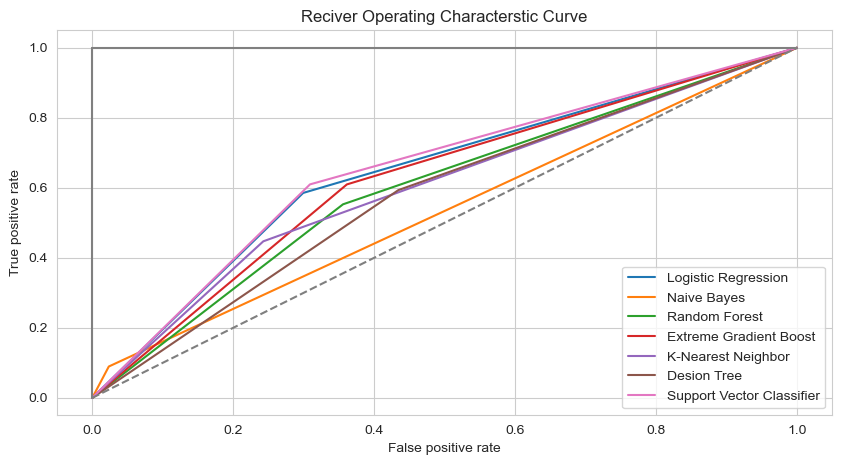

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict_test)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_predict_test)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predict_test)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predict_test)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predict_test)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predict_test)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predict_test)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

## Results

# Machine Learning with Oversampling Minority Class

In [1]:

# Prepare the originial data for oversampling
df2 = pd.read_csv("01_framingham_clean.csv")
X1 = df2.drop(columns=["TenYearCHD"])
y1 = df2["TenYearCHD"]

# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)

# Oversampling
from imblearn.over_sampling import RandomOverSampler

# oversample = RandomOverSampler(sampling_strategy='minority')    
oversample = RandomOverSampler(sampling_strategy=1)
X_over1, y_over1 = oversample.fit_resample(X_train1, y_train1)

X_train1 = X_over1
y_train1 = y_over1

NameError: name 'pd' is not defined

## Adjustment of Function

In [ ]:
def ml_model(model, X_train1, y_train1, X_test1, y_test1, X_val1, y_val1):
   
    # Fit the model
    model.fit(X_train1, y_train1)
    
    # Predict on the test set
    y_pred_test = model.predict(X_test1)
    y_pred_proba_test = model.predict_proba(X_test1)[:, 1]
    
    # Predict on the validation set
    y_pred_val = model.predict(X_val1)
    y_pred_proba_val = model.predict_proba(X_val1)[:, 1]
    
    # Calculate performance metrics for the test set
    acc_test = accuracy_score(y_test1, y_pred_test)
    prec_test = precision_score(y_test1, y_pred_test)
    rec_test = recall_score(y_test1, y_pred_test)
    f1_test = f1_score(y_test1, y_pred_test)
    roc_test = roc_auc_score(y_test1, y_pred_proba_test)
    
    # Calculate performance metrics for the validation set
    acc_val = accuracy_score(y_val1, y_pred_val)
    prec_val = precision_score(y_val1, y_pred_val)
    rec_val = recall_score(y_val1, y_pred_val)
    f1_val = f1_score(y_val1, y_pred_val)
    roc_val = roc_auc_score(y_val1, y_pred_proba_val)
    
    # Print performance on the test set
    print("Test Set Performance:")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test1, y_pred_test))
    print("\nAccuracy of Model (Test):", acc_test * 100, "\n")
    print(classification_report(y_test1, y_pred_test))
    
    # Print performance on the validation set
    print("Validation Set Performance:")
    print("Confusion Matrix (Validation):")
    print(confusion_matrix(y_val1, y_pred_val))
    print("\nAccuracy of Model (Validation):", acc_val * 100, "\n")
    print(classification_report(y_val1, y_pred_val))
    
    return {
        'Test Accuracy': acc_test,
        'Test Precision': prec_test,
        'Test Recall': rec_test,
        'Test F1-Score': f1_test,
        'Test ROC AUC': roc_test,
        'Validation Accuracy': acc_val,
        'Validation Precision': prec_val,
        'Validation Recall': rec_val,
        'Validation F1-Score': f1_val,
        'Validation ROC AUC': roc_val
    }

## Logistic Regression

## Naive Bayes

## Decision Tree

## Random Forest

## kNN

# Machine Learning mit SMOTE